Saving download.jpg to download.jpg


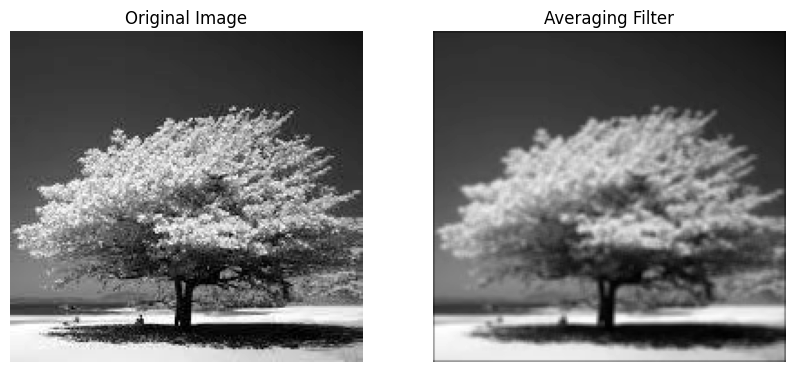

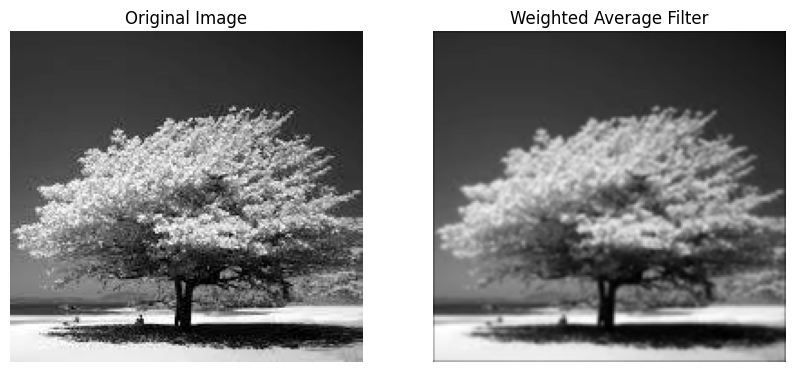

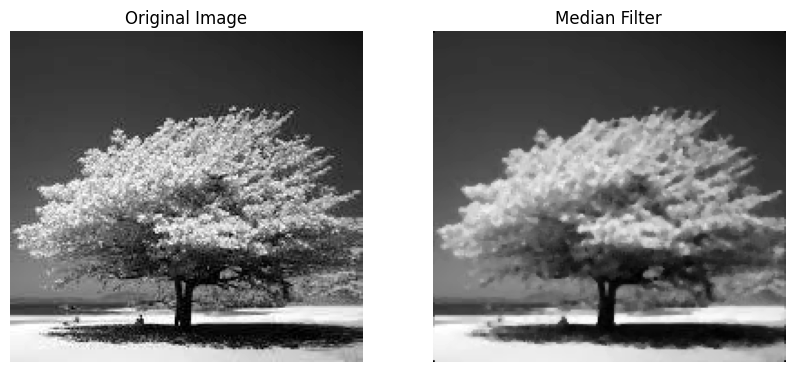

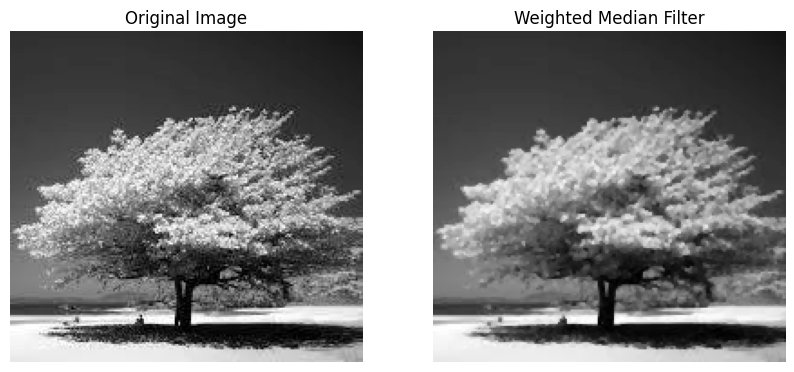

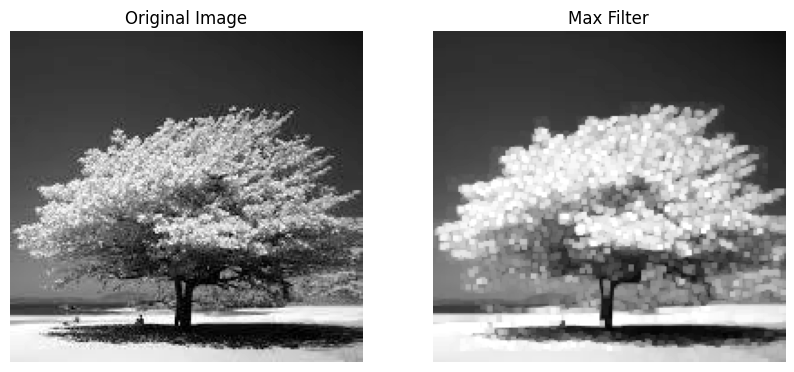

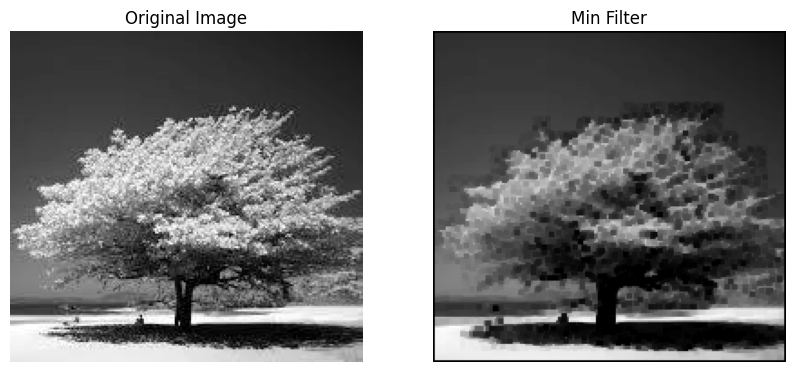

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import cv2


def upload_image():
    uploaded = files.upload()
    if uploaded:
        file_name = next(iter(uploaded))
        img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
        return img
    else:
        print("No files were uploaded.")
        return None


def pad_image(img, pad_size):
    return np.pad(img, pad_size, mode='constant', constant_values=0)


def averaging_filter(img, kernel_size=3):
    pad_size = kernel_size // 2
    padded_img = pad_image(img, pad_size)
    output_img = np.zeros_like(img)

    for i in range(pad_size, padded_img.shape[0] - pad_size):
        for j in range(pad_size, padded_img.shape[1] - pad_size):
            neighborhood = padded_img[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1]
            output_img[i-pad_size, j-pad_size] = np.mean(neighborhood)

    return output_img


def weighted_average_filter(img, kernel):
    kernel_size = kernel.shape[0]
    pad_size = kernel_size // 2
    padded_img = pad_image(img, pad_size)
    output_img = np.zeros_like(img)

    for i in range(pad_size, padded_img.shape[0] - pad_size):
        for j in range(pad_size, padded_img.shape[1] - pad_size):
            neighborhood = padded_img[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1]
            output_img[i-pad_size, j-pad_size] = np.sum(neighborhood * kernel) / np.sum(kernel)

    return output_img


def median_filter(img, kernel_size=3):
    pad_size = kernel_size // 2
    padded_img = pad_image(img, pad_size)
    output_img = np.zeros_like(img)

    for i in range(pad_size, padded_img.shape[0] - pad_size):
        for j in range(pad_size, padded_img.shape[1] - pad_size):
            neighborhood = padded_img[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1]
            output_img[i-pad_size, j-pad_size] = np.median(neighborhood)

    return output_img


def weighted_median_filter(img, kernel):
    kernel_size = kernel.shape[0]
    pad_size = kernel_size // 2
    padded_img = pad_image(img, pad_size)
    output_img = np.zeros_like(img)

    for i in range(pad_size, padded_img.shape[0] - pad_size):
        for j in range(pad_size, padded_img.shape[1] - pad_size):
            neighborhood = padded_img[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1]
            weighted_neighborhood = np.repeat(neighborhood.flatten(), kernel.flatten().astype(int))
            output_img[i-pad_size, j-pad_size] = np.median(weighted_neighborhood)

    return output_img


def max_filter(img, kernel_size=3):
    pad_size = kernel_size // 2
    padded_img = pad_image(img, pad_size)
    output_img = np.zeros_like(img)

    for i in range(pad_size, padded_img.shape[0] - pad_size):
        for j in range(pad_size, padded_img.shape[1] - pad_size):
            neighborhood = padded_img[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1]
            output_img[i-pad_size, j-pad_size] = np.max(neighborhood)

    return output_img


def min_filter(img, kernel_size=3):
    pad_size = kernel_size // 2
    padded_img = pad_image(img, pad_size)
    output_img = np.zeros_like(img)

    for i in range(pad_size, padded_img.shape[0] - pad_size):
        for j in range(pad_size, padded_img.shape[1] - pad_size):
            neighborhood = padded_img[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1]
            output_img[i-pad_size, j-pad_size] = np.min(neighborhood)

    return output_img


def display_images(original, filtered, filter_name):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered, cmap='gray')
    plt.title(filter_name)
    plt.axis('off')

    plt.show()


def main():
    img = upload_image()
    if img is None:
        return


    avg_filtered = averaging_filter(img, kernel_size=3)
    display_images(img, avg_filtered, 'Averaging Filter')

    weighted_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
    weighted_avg_filtered = weighted_average_filter(img, weighted_kernel)
    display_images(img, weighted_avg_filtered, 'Weighted Average Filter')

    median_filtered = median_filter(img, kernel_size=3)
    display_images(img, median_filtered, 'Median Filter')

    weighted_median_filtered = weighted_median_filter(img, weighted_kernel)
    display_images(img, weighted_median_filtered, 'Weighted Median Filter')

    max_filtered = max_filter(img, kernel_size=3)
    display_images(img, max_filtered, 'Max Filter')

    min_filtered = min_filter(img, kernel_size=3)
    display_images(img, min_filtered, 'Min Filter')

if __name__ == "__main__":
    main()
